In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Creating a function to calculate w - non-parametric criterion for outlier identification (Wilkinson et al.) of the normal distribution: $w=q_{75}+1.5(q_{75}-q_{25})$
norm.ppf from spicy.stats can help us return the quantile of a Normal distribution, for example:

In [9]:
mu=1
sigma=3
q=.75
norm.ppf(q, loc=mu, scale=sigma)

3.0234692505882452

In [26]:
def calc_w(mu,sigma):
    q75= norm.ppf(q=0.75, loc=mu, scale=sigma)
    q25= norm.ppf(q=0.25, loc=mu, scale=sigma)
    w=q75+1.5*(q75-q25)
    return w

After calculating $w$, we can define a function to calculate the probability that data points will lie outside our outlier identification: $P(x>w)$ when our data follows normal distribution. 

In [40]:
def calc_prob_outlier(w,mu,sigma):
    prob=norm.sf(w,loc=mu,scale=sigma)
    return prob

In [43]:
mu=3
sigma=2
w=calc_w(mu,sigma)
print("w=",round(w,2))
prob=calc_prob_outlier(w,mu,sigma)
print("Probability of data outside the outlier identification=",round(prob*100,2),"%")

w= 8.4
Probability of data outside the outlier identification= 0.35 %


Upper cut off point for Normal distrbition, mean: 3 standard deviation: 2


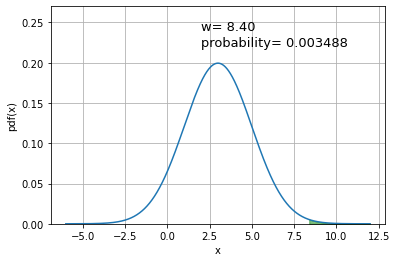

In [68]:
print("Upper cut off point for Normal distrbition, mean:",mu,"standard deviation:",sigma) 
fig, ax = plt.subplots()
x= np.arange(-mu*2,mu*4,0.001)
ax.plot(x, norm.pdf(x,loc=mu,scale=sigma))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px= np.arange(w,mu*4,0.001)
ax.set_ylim(0,0.27)
ax.fill_between(px,norm.pdf(px,loc=mu,scale=sigma),alpha=0.5, color='g')
ax.text(mu-1,0.24,"w= %.2f" %w, fontsize=13)
ax.text(mu-1,0.22,"probability= %.6f" %prob, fontsize=13)
plt.show()